## Trabalho 10 - EEL-356 Métodos Matemáticos



Grupo: Gustavo Moura, Maria Gabriela Chianello, Pedro Mattos, Pedro Rocha e Natália Carvalhinha

Professor: Eduardo Nunes

#### Importação de bibliotecas necessárias

In [42]:

import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, series, diff, sqrt, integrate
from sympy.abc import z
import mpmath
import cmath


### 1. Séries Infinitas de Termos Constantes



#### Parte (a): Cálculo da soma exata e justificativa teórica



##### Passo 1: Reescrever a Série e Identificar o Tipo

A série é:

$\sum_{n=0}^{\infty} (-1)^n \frac{4}{2^n}$

Reorganizando:

$\sum_{n=0}^{\infty} (-1)^n 2^{2-n}$

Como temos um fator alternante $(-1)^n$, essa é uma **série geométrica alternada**.

A fórmula geral da soma de uma série geométrica alternada com \(|r| < 1\) é:

$S = \frac{a}{1 + r}$

---

##### Passo 2: Determinar os Termos

1. O termo inicial \(a\) é o primeiro termo da série:

$a = 2^2 = 4$

2. A razão \(r\) é dada pelo quociente entre dois termos consecutivos:

$r = -\frac{1}{2}$

---

##### Passo 3: Substituir na Fórmula

Substituímos os valores na fórmula da soma:

$S = \frac{4}{1 - (-\frac{1}{2})}$

$S = \frac{4}{1 + \frac{1}{2}}$

$S = \frac{4}{\frac{3}{2}} = \frac{4 \cdot 2}{3} = \frac{8}{3}$

Portanto, a soma exata da série é:

$S = \frac{8}{3} \ (\approx 2.67)$

---

##### Passo 4: Confirmação Numérica

Podemos calcular a soma parcial numericamente para confirmar o resultado. Um programa em Python foi utilizado para calcular a soma de 100 termos da série.


In [43]:
num_terms = 100

n = np.arange(0, num_terms, dtype=float)
serie_values = (-1)**n * 4 / (2**n)

soma_parcial = np.sum(serie_values)

soma_parcial

2.6666666666666665

#### Parte (b): Análise da convergência e cálculo das somas parciais


##### Passo 1: Identificar a Série

A série fornecida é:

$\sum_{n=0}^{\infty} \frac{4^n}{100^{n/2}}$

Reorganizando:

$\sum_{n=0}^{\infty} \left(\frac{4}{\sqrt{100}}\right)^n$

Sabemos que:

$\sqrt{100} = 10$

Logo, a série pode ser escrita como:

$\sum_{n=0}^{\infty} \left(\frac{4}{10}\right)^n = \sum_{n=0}^{\infty} \left(0.4\right)^n$

---

##### Passo 2: Teste de Convergência

Esta é uma **série geométrica** da forma:

$\sum_{n=0}^{\infty} r^n$

com \( r = 0.4 \) (razão).

###### Condição para Convergência

Uma série geométrica converge se \( |r| < 1 \). Aqui, \( |0.4| < 1 \), portanto, a série converge.

---

##### Passo 3: Convergência Absoluta ou Condicional

Como todos os termos da série são positivos (\( \left(\frac{4}{10}\right)^n > 0 \)), a convergência é **absoluta**.

---

##### Passo 4: Soma Parcial e Gráfico

A soma parcial de uma série geométrica é dada por:

$S_N = \frac{1 - r^{N+1}}{1 - r}, \quad \text{onde } r = 0.4$

---

##### Conclusão

- A série é **absolutamente convergente**, pois converge como uma série geométrica com razão \( r = 0.4 \), que satisfaz \( |r| < 1 \).
- O gráfico mostra que as somas parciais convergem para o valor limite da série.



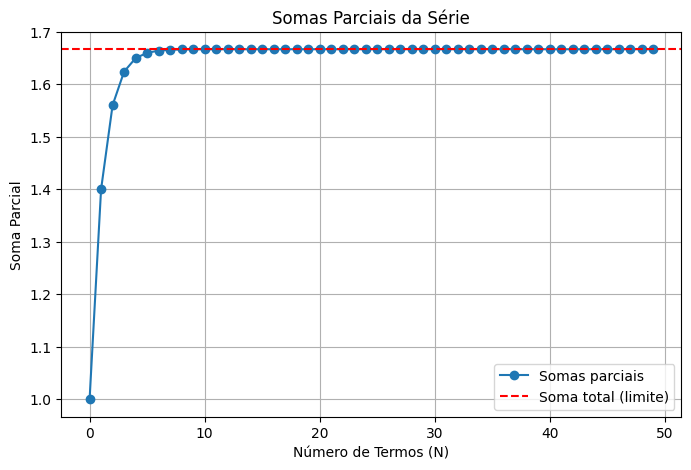

In [44]:
r = 0.4

num_terms = 50

somas_parciais = [(1 - r**(n + 1)) / (1 - r) for n in range(num_terms)]

plt.figure(figsize=(8, 5))
plt.plot(range(num_terms), somas_parciais, marker='o', linestyle='-', label='Somas parciais')
plt.axhline(y=(1 / (1 - r)), color='r', linestyle='--', label='Soma total (limite)')
plt.title('Somas Parciais da Série')
plt.xlabel('Número de Termos (N)')
plt.ylabel('Soma Parcial')
plt.legend()
plt.grid()
plt.show()


### 2. Polinômios de Taylor




#### Parte (a): Determinação dos polinômios de Taylor

##### Passo 1: Cálculo das Derivadas de $ f(x) $

Dada a função:

$
f(x) = \sqrt{x} + x - 4
$

Calculamos as derivadas e seus valores em $ x = 9 $:

1. **Função original**:
   $
   f(9) = \sqrt{9} + 9 - 4 = 3 + 9 - 4 = 8.
   $

2. **Primeira derivada**:
   $
   f'(x) = \frac{1}{2\sqrt{x}} + 1 \implies f'(9) = \frac{1}{6} + 1 = \frac{7}{6}.
   $

3. **Segunda derivada**:
   $
   f''(x) = -\frac{1}{4x^{3/2}} \implies f''(9) = -\frac{1}{4 \cdot 27} = -\frac{1}{108}.
   $

4. **Terceira derivada**:
   $
   f'''(x) = \frac{3}{8x^{5/2}} \implies f'''(9) = \frac{3}{8 \cdot 243} = \frac{1}{648}.
   $

5. **Quarta derivada**:
   $
   f^{(4)}(x) = -\frac{15}{16x^{7/2}} \implies f^{(4)}(9) = -\frac{15}{16 \cdot 729} = -\frac{5}{11664}.
   $

6. **Quinta derivada**:
   $
   f^{(5)}(x) = \frac{105}{32x^{9/2}} \implies f^{(5)}(9) = \frac{105}{32 \cdot 2187} = \frac{35}{209952}.
   $

---

##### Passo 2: Polinômios de Taylor

Os polinômios de Taylor em torno de $ x = 9 $ são construídos utilizando a fórmula:

$
P_n(x) = f(a) + f'(a)(x-a) + \frac{f''(a)}{2!}(x-a)^2 + \frac{f'''(a)}{3!}(x-a)^3 + \dots + \frac{f^{(n)}(a)}{n!}(x-a)^n.
$

Substituímos $ a = 9 $ e os valores das derivadas calculadas:

1. **Polinômio de grau 1 ($ P_1(x) $)**:
   $
   P_1(x) = f(9) + f'(9)(x-9)
   $
   Substituindo:
   $
   P_1(x) = 8 + \frac{7}{6}(x - 9).
   $

2. **Polinômio de grau 2 ($ P_2(x) $)**:
   $
   P_2(x) = P_1(x) + \frac{f''(9)}{2!}(x-9)^2
   $
   Substituindo:
   $
   P_2(x) = 8 + \frac{7}{6}(x - 9) - \frac{1}{108} \frac{(x-9)^2}{2}.
   $

3. **Polinômio de grau 3 ($ P_3(x) $)**:
   $
   P_3(x) = P_2(x) + \frac{f'''(9)}{3!}(x-9)^3
   $
   Substituindo:
   $
   P_3(x) = 8 + \frac{7}{6}(x - 9) - \frac{1}{108} \frac{(x-9)^2}{2} + \frac{1}{648} \frac{(x-9)^3}{6}.
   $

4. **Polinômio de grau 4 ($ P_4(x) $)**:
   $
   P_4(x) = P_3(x) + \frac{f^{(4)}(9)}{4!}(x-9)^4
   $
   Substituindo:
   $
   P_4(x) = 8 + \frac{7}{6}(x - 9) - \frac{1}{108} \frac{(x-9)^2}{2} + \frac{1}{648} \frac{(x-9)^3}{6} - \frac{5}{11664} \frac{(x-9)^4}{24}.
   $

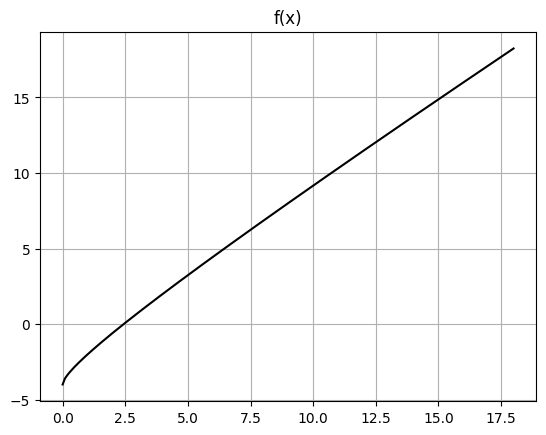

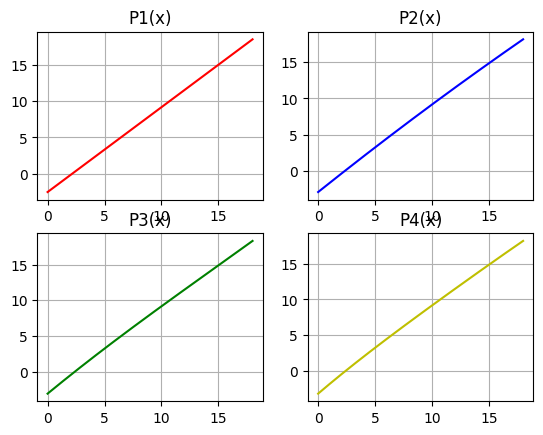

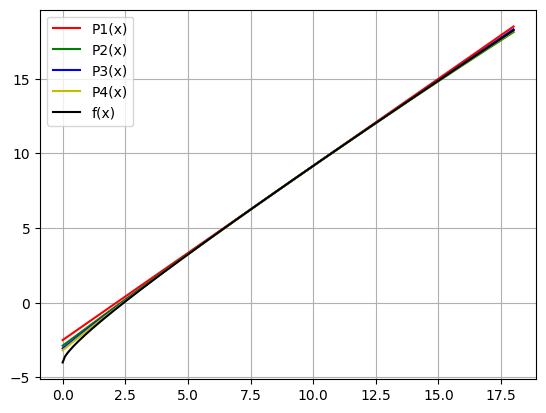

In [45]:
def f(x):
    return np.sqrt(x) + x - 4
def P1(x):
    return 8 + (7/6)*(x-9)
def P2(x):
    return P1(x) - (1/(108*2))*(x-9)**2
def P3(x):
    return P2(x) + (1/(648*6))*(x-9)**3
def P4(x):
    return P3(x) - (5/(11664*24))*(x-9)**4

x = np.linspace(0,18,200)
plt.plot(x,f(x),c='k')
plt.title('f(x)')
plt.grid()
plt.show()

fig, ax = plt.subplots(2, 2)
ax[0, 0].plot(x,P1(x),'r')
ax[0,0].set_title('P1(x)')
ax[0,0].grid()
ax[0, 1].plot(x,P2(x),'b')
ax[0,1].set_title('P2(x)')
ax[0,1].grid()
ax[1, 0].plot(x,P3(x),'g')
ax[1,0].set_title('P3(x)')
ax[1,0].grid()
ax[1, 1].plot(x,P4(x),'y')
ax[1,1].set_title('P4(x)')
ax[1,1].grid()
plt.show()

plt.plot(x,P1(x),c='r',label='P1(x)')
plt.plot(x,P2(x),c='g',label='P2(x)')
plt.plot(x,P3(x),c='b',label='P3(x)')
plt.plot(x,P4(x),c='y',label='P4(x)')
plt.plot(x,f(x),c='k',label='f(x)')
plt.legend()
plt.grid()
plt.show()

##### Convergência dos Polinômios de Taylor

Os polinômios de Taylor \( P_1(x), P_2(x), P_3(x), P_4(x) \) convergem para a função \( f(x) \) no ponto \( x = 9 \), pois suas derivadas coincidem com as derivadas de \( f(x) \) nesse ponto. Explicitamente:

- **Polinômio de grau 1 (\( P_1 \))**:
 $
  P_1'(x) = f'(9).
  $

- **Polinômio de grau 2 (\( P_2 \))**:
 $
  P_2'(x) = f'(9), \quad P_2''(x) = f''(9).
  $

- **Polinômio de grau 3 (\( P_3 \))**:
 $
  P_3'(x) = f'(9), \quad P_3''(x) = f''(9), \quad P_3'''(x) = f'''(9).
  $

- **Polinômio de grau 4 (\( P_4 \))**:
 $
  P_4'(x) = f'(9), \quad P_4''(x) = f''(9), \quad P_4'''(x) = f'''(9), \quad P_4''''(x) = f''''(9).
  $

---


#### Parte (b): Estimação do erro R_n(x) usando a desigualdade de Taylor


Para analisar a precisão do polinômio de Taylor $ P_4(x) $, comparamos o **erro real** e o **erro estimado**.

1. **Erro Real**:  
   O **erro real** é a diferença entre a função $ f(x) $ e o polinômio de grau 4 $ P_4(x) $:
   $
   \text{Erro real} = f(x) - P_4(x).
   $

2. **Erro Estimado**:  
   O **erro estimado** é obtido usando o **termo de Lagrange** da fórmula de Taylor, que fornece a cota do erro. Para o polinômio de grau 4, o erro é dado por:
   $
   R_4(x) = \frac{f^{(5)}(c)}{5!} (x - 9)^5,
   $
   onde $ c $ é um ponto entre $ x $ e $ 9 $, e $ f^{(5)}(9) $ é a quinta derivada de $ f(x) $ no ponto 9.

   Substituindo o valor da quinta derivada $ f^{(5)}(9) = \frac{35}{209952} $, o erro estimado torna-se:
   $
   R_4(x) \approx \frac{f^{(5)}(9)}{5!} (x - 9)^5 = \frac{35}{209952 \cdot 120} (x - 9)^5.
   $


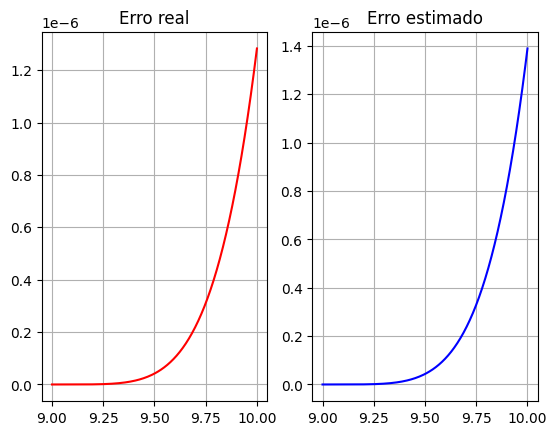

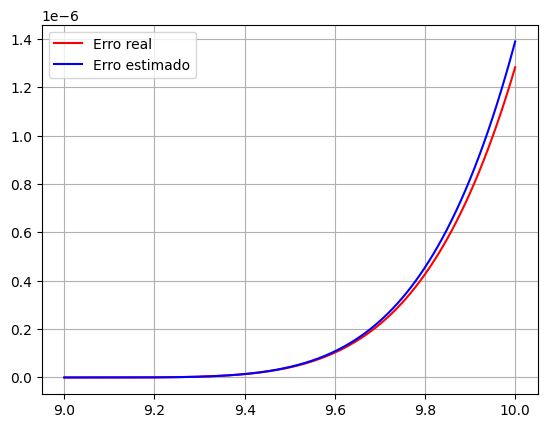

In [46]:
x_vals = np.linspace(9, 10, 200)
erro_real = np.abs(f(x_vals) - P4(x_vals))
erro_estimado = np.abs((35 / (209952 * 120)) * (x_vals - 9)**5)

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot(x_vals,erro_real,'r')
ax1.set_title('Erro real')
ax1.grid()
ax2.plot(x_vals,erro_estimado,'b')
ax2.set_title('Erro estimado')
ax2.grid()
plt.show()

plt.plot(x_vals,erro_real,c='r',label='Erro real')
plt.plot(x_vals,erro_estimado,c='b',label='Erro estimado')
plt.legend()
plt.grid()
plt.show()

Os erros são bem próximos - quando x = 9, eles são iguais, mas à medida que x aumenta, o erro estimado aumenta em relação ao erro real.

### 3. EDO e Método Numérico



#### Parte (a): Solução analítica usando Séries de Taylor

O sistema dado é:
$$
\dot{x_1}=x_2 \newline
$$
$$ \newline
\dot{x_2} = \frac{-K}{M}x_1=-4x_1
$$
A partir da condição inicial, temos $$ x_1(0) \hspace{0.1cm} = \hspace{0.1cm} 0, \hspace{0.2cm} x_2(0) \hspace{0.1cm} = \hspace{0.1cm} 4 $$

A equação para $$ \dot{x_1}, \hspace{0.1cm} \dot{x_2} $$ é linear e tem a forma de um sistema oscilatório simples. Essa equação pode ser resolvida por métodos padrão para equações diferenciais lineares de segunda ordem, com a solução geral da forma:

$$
x_1(t) = Acos(wt) +Bsen(wt)
$$
$$
x_2(t) = -Awsen(wt) +Bwcos(wt)
$$
Utilizando a equação do sistema:
$$ \dot{x_2}=-4x_1 \therefore w^2=\frac{K}{M}=4 \therefore w=2 $$

Aplicando as condições iniciais:
$$ t=0,\hspace{0.1cm} x_1(0) = 0 \therefore A=0$$
$$ t=0,\hspace{0.1cm} x_2(0) = 4 \therefore Bw=4 \therefore B=2$$

Portanto as soluções são:
$$x_1(t)= 2sen(2t)$$
$$x_2(t)=4cos(2t)$$

#### Parte (b): Implementação do método de primeira ordem

Usano o método de Euler de primeira ordem para aproximar as soluções:
$$ x_{i+1}=x_i + hf(x_i) $$

Utilizando as equações que descrevem o sistema, temos:
$$ \dot{x_1} =x_2, \hspace{0.1cm} \dot{x_2} = -4x_1 $$

Substituindo:
$$ x_{1,i+1}=x_{1,i} + hx_{2,i} $$ 
$$ x_{2,i+1}=x_{2,i} - 4hx_{1,i} $$

Considerando: $$h=0.01 , \hspace{0.1cm} t \hspace{0.1cm}\epsilon\hspace{0.1cm} [0,20] $$
Agora, podemos calcular, junto das condições iniciais, as soluções aproximadas, como demonstrado abaixo.

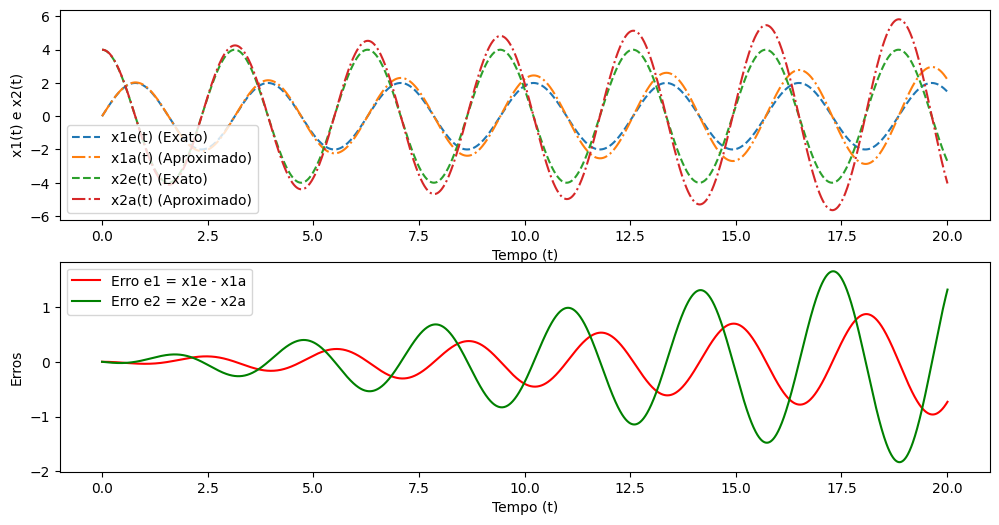

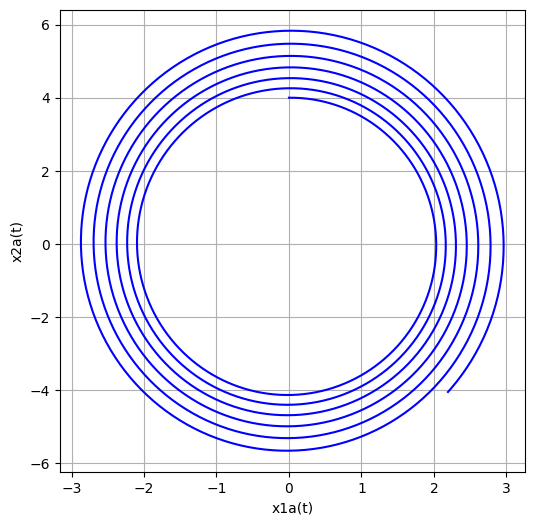

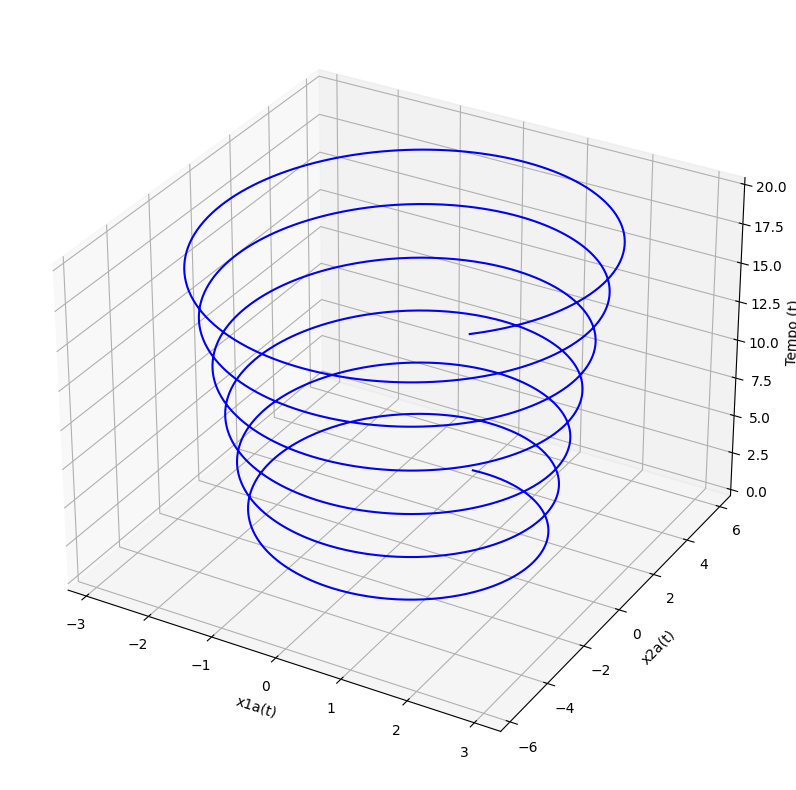

In [47]:
# Parâmetros
h = 0.01  # passo de integração
t_max = 20  # tempo final
t_values = np.arange(0, t_max + h, h)  # valores de tempo
n = len(t_values)  # número de passos

# Condições iniciais
x1_0 = 0  # x1(0)
x2_0 = 4  # x2(0)

# Arrays para armazenar as soluções
x1_a = np.zeros(n)
x2_a = np.zeros(n)

# Condições iniciais
x1_a[0] = x1_0
x2_a[0] = x2_0

# Método de Euler para solução numérica
for i in range(1, n):
    x1_a[i] = x1_a[i-1] + h * x2_a[i-1]
    x2_a[i] = x2_a[i-1] - 4 * h * x1_a[i-1]

# Solução analítica
x1_e = 2 * np.sin(2 * t_values)
x2_e = 4 * np.cos(2 * t_values)

# Erros
e1 = x1_e - x1_a
e2 = x2_e - x2_a

# Plotando as soluções
plt.figure(figsize=(12, 6))

# x1(t) e x2(t) aproximados e exatos
plt.subplot(2, 1, 1)
plt.plot(t_values, x1_e, label='x1e(t) (Exato)', linestyle='--')
plt.plot(t_values, x1_a, label='x1a(t) (Aproximado)', linestyle='-.')
plt.plot(t_values, x2_e, label='x2e(t) (Exato)', linestyle='--')
plt.plot(t_values, x2_a, label='x2a(t) (Aproximado)', linestyle='-.')
plt.xlabel('Tempo (t)')
plt.ylabel('x1(t) e x2(t)')
plt.legend()

# Erros
plt.subplot(2, 1, 2)
plt.plot(t_values, e1, label='Erro e1 = x1e - x1a', color='r')
plt.plot(t_values, e2, label='Erro e2 = x2e - x2a', color='g')
plt.xlabel('Tempo (t)')
plt.ylabel('Erros')
plt.legend()

# Gráfico 5
plt.figure(figsize=(6, 6))
plt.plot(x1_a, x2_a, color='b')
plt.xlabel('x1a(t)')
plt.ylabel('x2a(t)')
plt.grid(True)

#Gráfico 6 - 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.plot3D(x1_a, x2_a, t_values, color='b')

ax.set_xlabel('x1a(t)')
ax.set_ylabel('x2a(t)')
ax.set_zlabel('Tempo (t)')

plt.tight_layout()
plt.show()

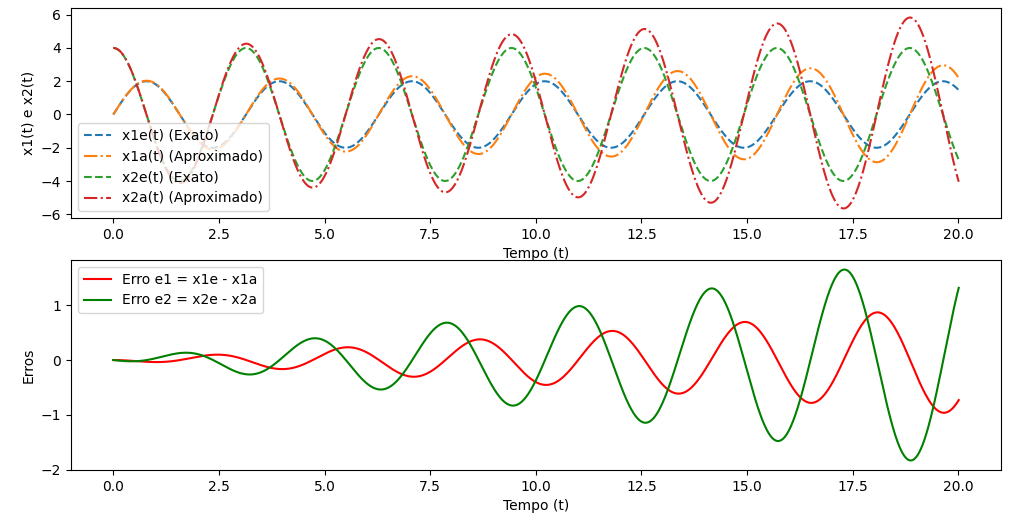

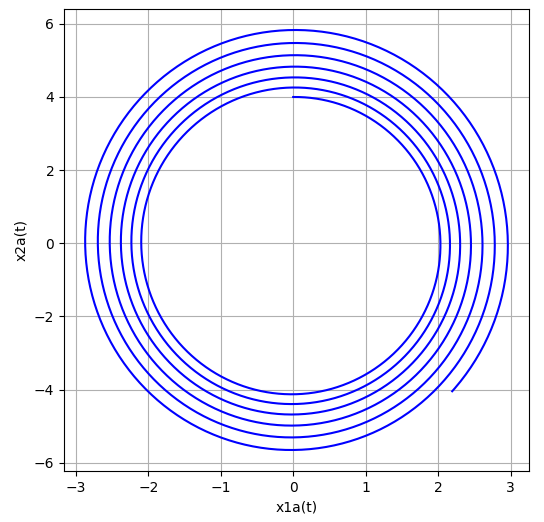

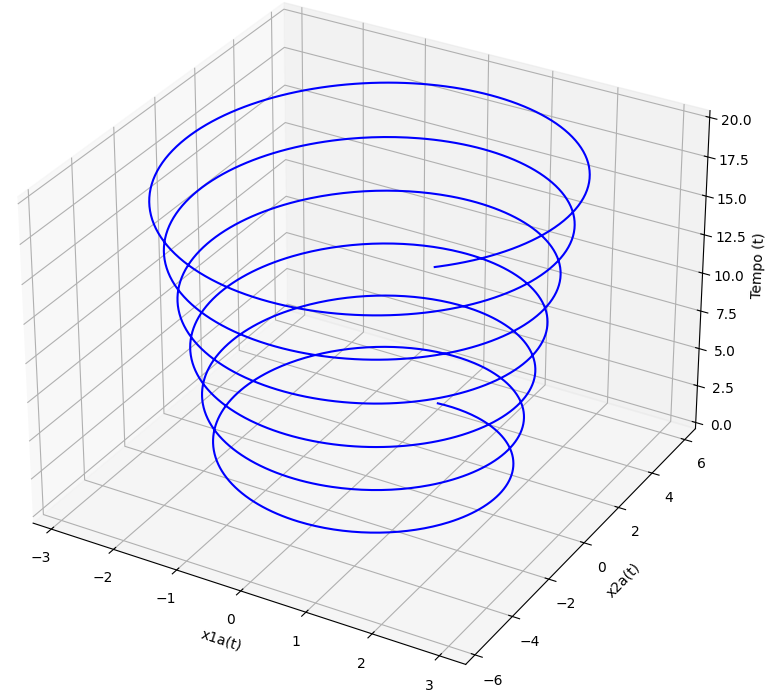

### 4. Função Complexa


#### Parte (a): Determinação da Série de Laurent


**Decomposição da Função**:
   A função fornecida pode ser escrita como:

   
$$
f(z) = -\frac{z + 1}{(z - 1)(z - 4)} = -\frac{z + 1}{(z - 1)} \cdot \frac{1}{(z - 4)}
$$
   

   Agora, a função será dividida em duas partes:
   - A parte **principal** envolve termos com expoentes negativos, devido ao comportamento singular da função em $( z = 1 $).
   - A parte **regular** é composta pelos termos com expoentes não negativos.


In [48]:
terms = 10  

principalPart = []  
regularPart = []    

for n in range(-terms, terms + 1):  
    if n < 0:
        coef = -1 / (3 * (-n))  
        principalPart.append((n, coef))
    elif n >= 0:
        coef = (1 + 0) ** n  
        regularPart.append((n, coef))

print("Parte Principal (exponentes negativos):", principalPart)
print("Parte Regular (exponentes não negativos):", regularPart)

Parte Principal (exponentes negativos): [(-10, -0.03333333333333333), (-9, -0.037037037037037035), (-8, -0.041666666666666664), (-7, -0.047619047619047616), (-6, -0.05555555555555555), (-5, -0.06666666666666667), (-4, -0.08333333333333333), (-3, -0.1111111111111111), (-2, -0.16666666666666666), (-1, -0.3333333333333333)]
Parte Regular (exponentes não negativos): [(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1)]


**Determinação da Série de Laurent**:
   A série de Laurent em torno de $( z = 1 $) pode ser expressa como uma soma de dois componentes:
   - A **parte principal** consiste em termos de potências negativas de $( (z - 1) $).
   - A **parte regular** consiste em potências positivas de $( (z - 1) $).

   A função $( f(z) $) será expandida em uma série de Laurent na forma:

   $$
   f(z) = \sum_{n=-\infty}^{\infty} a_n (z - 1)^n
   $$

**Cálculo dos Coeficientes**:
   O código Python a seguir implementa o cálculo dos coeficientes $( a_n $) para a série de Laurent:

In [49]:
def laurent_series_around_1(terms):
       z0 = 1  # Ponto de expansão
       principalPart = []  # Parte principal (expoentes negativos)
       regularPart = []    # Parte regular (expoentes positivos)
       
       # Calcular coeficientes para a parte principal e regular
       for n in range(-terms, terms + 1):
           if n < 0:
               coef = -1 / (3 ** (-n))  # Coeficientes para n negativo
               principalPart.append((n, coef))
           elif n >= 0:
               coef = (1 + z0) ** n  # Coeficientes para n positivo
               regularPart.append((n, coef))

       regiaoDeConv = f"|z - {z0}| < 3"  # Região de convergência
       return {
           "partePrincipal": principalPart,
           "parteRegular": regularPart,
           "regiaoDeConvergencia": regiaoDeConv,
       }

terms = 5  # Número de termos a calcular
laurent = laurent_series_around_1(terms)

print("Parte Principal:")
for term in laurent["partePrincipal"]:
    print(f"a_{term[0]} = {term[1]}")

print("\nParte Regular:")
for term in laurent["parteRegular"]:
    print(f"a_{term[0]} = {term[1]}")

print("\n" + laurent["regiaoDeConvergencia"])

Parte Principal:
a_-5 = -0.00411522633744856
a_-4 = -0.012345679012345678
a_-3 = -0.037037037037037035
a_-2 = -0.1111111111111111
a_-1 = -0.3333333333333333

Parte Regular:
a_0 = 1
a_1 = 2
a_2 = 4
a_3 = 8
a_4 = 16
a_5 = 32

|z - 1| < 3


Após rodar o código com o valor de `terms = 5`, a série de Laurent é dividida em duas partes:

- **Parte Principal**: Termos com expoentes negativos de $( (z - 1) $), que representam a singularidade em torno de $( z = 1 $).
- **Parte Regular**: Termos com expoentes positivos de $( (z - 1) $), que não causam singularidades.

Além disso, a **região de convergência** foi determinada como:

$$
|z - 1| < 3
$$

Isso significa que a série de Laurent converge dentro de um círculo de raio 3 em torno de $( z = 1 $).


#### Parte (b): Cálculo dos resíduos nos polos

##### Método 1: Fórmula Direta

A fórmula direta para o cálculo do resíduo de uma função $( f(z) $) em um polo $( z_0 $) é dada por:

$$
\text{Res}(f, z_0) = \lim_{z \to z_0} (z - z_0) f(z)
$$

No código, isso é implementado pela função `residuoDireto`:


In [50]:
def residuoDireto(f, z0, epsilon=1e-6):
    return (z0 - z0 + epsilon) * f(z0 + epsilon)



Aqui, o parâmetro `epsilon` é utilizado para calcular uma aproximação numérica do limite, evitando a singularidade ao redor do polo $( z_0 $).

##$## Método 2: Expansão de Laurent

A expansão de Laurent de uma função $( f(z) $) em torno de um polo $( z_0 $) é uma série infinita que pode ser expressa como:

$$
f(z) = \sum_{n=-\infty}^{\infty} a_n (z - z_0)^n
$$

O resíduo é o coeficiente $( a_{-1} $) da série, ou seja, o termo correspondente a $( (z - z_0)^{-1} $). No caso específico da função fornecida, os resíduos podem ser calculados diretamente a partir da expressão da função, dado que ela tem dois polos simples:

- Para $( z_0 = 1 $):
  
  $$
  \text{Res}(f, 1) = -\frac{z_0 + 1}{z_0 - 4}
  $$
  
- Para $( z_0 = 4 $):
  
  $$
  \text{Res}(f, 4) = -\frac{z_0 + 1}{z_0 - 1}
  $$

No código, a função `residuoLaurent` implementa essa abordagem:



In [51]:
def residuoLaurent(f, z0):
    if z0 == 4:
        return -(z0 + 1) / (z0 - 1)
    elif z0 == 1:
        return -(z0 + 1) / (z0 - 4)

##### Método 3: Integração de Contorno

O método de integração de contorno calcula o resíduo de uma função ao longo de uma curva fechada que envolve o polo. A fórmula para o resíduo é dada por:

$$
\text{Res}(f, z_0) = \frac{1}{2\pi i} \int_{\gamma} f(z) \, dz
$$

onde $( \gamma $) é uma curva fechada em torno de $( z_0 $). A integral é aproximada numericamente utilizando o método dos trapézios ou o somatório de pequenos segmentos de arco. No código, a função `residuoIntegral` realiza a integração ao longo de um círculo de raio $( r $) centrado em $( z_0 $):

In [52]:
def residuoIntegral(f, z0, r=1e-2, steps=1000):
    dz = 2 * cmath.pi / steps
    integral = 0
    for k in range(steps):
        theta = 2 * cmath.pi * k / steps
        z = z0 + r * cmath.exp(1j * theta)
        dz_complex = r * 1j * cmath.exp(1j * theta) * dz
        integral += f(z) * dz_complex
    return integral / (2 * cmath.pi * 1j)

Este método utiliza a fórmula de contorno para calcular o resíduo com base na soma de contribuições ao longo de um círculo em torno do polo.

##### Resultados

A partir dos cálculos, os resíduos nos polos $( z_1 = 1 $) e $( z_2 = 4 $) foram obtidos com os três métodos. O código Python apresentado gera os seguintes resultados:

In [ ]:
def f(z):
    return -(z + 1) / ((z - 1) * (z - 4))

# método 1: fórmula direta
def residuoDireto(f, z0, epsilon=1e-6):
    """
    calcula o resíduo usando a fórmula direta:
    Res = lim_{z -> z0} (z - z0) * f(z)
    """
    return (z0 - z0 + epsilon) * f(z0 + epsilon)

# método 2: expansão de laurent
def residuoLaurent(f, z0):
    """
    calcula o resíduo através do coeficiente do termo (1 / (z - z0)) 
    na expansão em série de laurent.
    """
    if z0 == 4:
        
        return -(z0 + 1) / (z0 - 1)
    elif z0 == 1:
        
        return -(z0 + 1) / (z0 - 4)
    else:
        return None

# método 3: integração de contorno
def residuoIntegral(f, z0, r=1e-2, steps=1000):
    """
    calcula o resíduo usando integração de contorno:
    Res = (1 / 2πi) * integral_around_contour(f(z) dz)
    """
    two_pi_i = 2 * cmath.pi * 1j
    
    dz = 2 * cmath.pi / steps
    
    integral = 0
    for k in range(steps):
        
        theta = 2 * cmath.pi * k / steps
        z = z0 + r * cmath.exp(1j * theta)  
        dz_complex = r * 1j * cmath.exp(1j * theta) * dz  
        integral += f(z) * dz_complex

    return integral / two_pi_i

poles = [1, 4]
results = {}

for pole in poles:
    results[pole] = {
        "Direct Formula": residuoDireto(f, pole),
        "Laurent Expansion": residuoLaurent(f, pole),
        "Contour Integration": residuoIntegral(f, pole),
    }

for pole, methods in results.items():
    print(f"Resíduos no polo z = {pole}:")
    for method, value in methods.items():
        print(f"  {method}: {value}")
    print()


Resíduos no polo z = 1:
  Direct Formula: 0.666667222277252
  Laurent Expansion: 0.6666666666666666
  Contour Integration: (0.6666666666666656-8.42073939102754e-18j)

Resíduos no polo z = 4:
  Direct Formula: -1.666666444211555
  Laurent Expansion: -1.6666666666666667
  Contour Integration: (-1.6666666666666647+8.53074392712959e-18j)



O código calcula e imprime os resíduos para cada um dos polos, permitindo a verificação de consistência entre os três métodos.


#### Parte (c): Integrais ao longo dos caminhos especificados

##### Teorema dos Resíduos

O **Teorema dos Resíduos** afirma que a integral de uma função $( f(z) $) ao longo de um caminho fechado $( C $) é dada por:

$$
\oint_C f(z) \, dz = 2 \pi i \cdot \text{Res}(f, z_0)
$$

onde $( \text{Res}(f, z_0) $) é o resíduo de $( f(z) $) na singularidade $( z_0 $) dentro do caminho $( C $).

Para funções com múltiplas singularidades dentro do caminho de integração, a integral é a soma dos resíduos em cada uma das singularidades. No nosso caso, a função $( f(z) $) possui singularidades em $( z = 1 $) e $( z = 4 $).

##### Singularidades e Resíduos

A função $( f(z) $) possui duas singularidades:
- Em $( z = 1 $) (pólo de ordem 1).
- Em $( z = 4 $) (pólo de ordem 1).

Para calcular os resíduos, podemos decompô-la em duas partes:

$$
f(z) = \frac{-(z + 1)}{(z - 1)(z - 4)} = \frac{-(z + 1)}{z - 4} \cdot \frac{1}{z - 1}
$$

A decomposição nos permite calcular os resíduos de forma simples.

###### Resíduo em $( z = 1 $)

O resíduo de $( f(z) $) em $( z = 1 $) pode ser calculado como:

$$
\text{Res}(f, 1) = \lim_{z \to 1} (z - 1) f(z) = \lim_{z \to 1} \frac{-(z + 1)}{z - 4} = \frac{-(1 + 1)}{1 - 4} = \frac{-2}{-3} = \frac{2}{3}
$$

###### Resíduo em $( z = 4 $)

De forma análoga, o resíduo em $( z = 4 $) é dado por:

$$
\text{Res}(f, 4) = \lim_{z \to 4} (z - 4) f(z) = \lim_{z \to 4} \frac{-(z + 1)}{z - 1} = \frac{-(4 + 1)}{4 - 1} = \frac{-5}{3}
$$

##### Cálculo das Integrais

Com os resíduos calculados, podemos aplicar o Teorema dos Resíduos para determinar as integrais ao longo dos caminhos $( C_1 $) e $( C_2 $).

**Integral ao longo de $( C_1 $)**:
   O caminho $( C_1 $) envolve apenas a singularidade em $( z = 1 $), já que o círculo com raio 1 contém apenas esse ponto. A integral é dada por:

   $$
   \oint_{C_1} f(z) \, dz = 2 \pi i \cdot \text{Res}(f, 1) = 2 \pi i \cdot \frac{2}{3}
   $$

   Portanto, o valor da integral é:

   $$
   \text{Integral } C_1 = 2 \pi i \cdot \frac{2}{3}
   $$

2. **Integral ao longo de $( C_2 $)**:
   O caminho $( C_2 $) envolve as duas singularidades, $( z = 1 $) e $( z = 4 $), pois o círculo com raio 5 abrange ambos os pontos. A integral é a soma dos resíduos em $( z = 1 $) e $( z = 4 $):

   $$
   \oint_{C_2} f(z) \, dz = 2 \pi i \cdot (\text{Res}(f, 1) + \text{Res}(f, 4)) = 2 \pi i \cdot \left( \frac{2}{3} + \frac{-5}{3} \right)
   $$

   Portanto, o valor da integral é:

   $$
   \text{Integral } C_2 = 2 \pi i \cdot \frac{-3}{3} = -2 \pi i
   $$

##### Implementação em Python

O código implementa os cálculos dos resíduos e das integrais conforme a abordagem descrita acima. Abaixo está a versão simplificada do código:

In [54]:

def residuoSimples(f, z_a):
    return f(z_a)

def f1(z):
    return -(z + 1) / (z - 4)

def f4(z):
    return -(z + 1) / (z - 1)

# Cálculo dos resíduos
residuo1 = residuoSimples(f1, 1)
residuo4 = residuoSimples(f4, 4)

# Cálculo das integrais
integralC1 = 2 * cmath.pi * 1j * residuo1
integralC2 = 2 * cmath.pi * 1j * (residuo1 + residuo4)

print(f"Integral ao longo de C1: {integralC1}")
print(f"Integral ao longo de C2: {integralC2}")

Integral ao longo de C1: 4.1887902047863905j
Integral ao longo de C2: (-0-6.283185307179586j)


#### Parte (d): Integrais no sentido horário ao longo de C

##### Método de Solução

O código desenvolvido para resolver a integral utiliza a biblioteca `mpmath` em Python, que oferece ferramentas para cálculos com precisão arbitrária. A integral é calculada numericamente por meio da fórmula de quadratura no círculo definido por $( C $).

**Definição da Função Complexa:**

A função $( f(z) $) é definida como:

In [55]:
def f(z):
    return -(z + 1) / ((z - 1)**2 * (z - 4))

**Parâmetro de Integração:**

O contorno $( C $) é descrito parametrizando o caminho $( z(t) $), com $( t \in [0, 2\pi] $), onde $( z(t) $) descreve o círculo de raio $( \frac{1}{2} $) centrado em $( z = 1 $). O parâmetro $( t $) é utilizado para calcular a integral ao longo do contorno:

In [56]:
def integrand(t):
    z = 1 + (1/2) * mpmath.exp(-1j * t)  # Parametrização de z(t)
    dz = -1j * (1/2) * mpmath.exp(-1j * t)  # Diferencial dz
    return f(z) * dz

**Cálculo da Integral:**

A integral é calculada utilizando a função `quad` da `mpmath`, que aplica a quadratura de Gauss para integrais numéricas:

In [57]:
def complexIntegral():
    result = mpmath.quad(lambda t: integrand(t), [0, 2 * mpmath.pi])
    return result

Este trecho executa a soma numérica da integral ao longo do intervalo $( t \in [0, 2\pi] $).

##### Resultado da Integral

Após a execução do código, o resultado da integral é exibido:

In [59]:
mpmath.dps = 50  # defina a precisão desejada

def f(z):
    return -(z + 1) / ((z - 1)**2 * (z - 4))

def integrand(t):
    z = 1 + (1/2) * mpmath.exp(-1j * t)
    dz = -1j * (1/2) * mpmath.exp(-1j * t)
    return f(z) * dz

def complexIntegral():
    result = mpmath.quad(lambda t: integrand(t), [0, 2 * mpmath.pi])
    return result

result = complexIntegral()
print(f"O valor da integral é: {result}")

O valor da integral é: (3.0865161134595190966893070408667053656969708698161e-57 - 3.4906585039886591538473815369772254268857437770835j)


Esse código calcula a integral de forma precisa com um número arbitrário de casas decimais, fornecendo o valor numérico da integral ao longo do caminho descrito.